In [1]:
import sys
import pandas as pd
import numpy as np

# Define a random seed for reproducibility
seed = 0
np.random.seed(seed)

import sklearn
import xgboost
import keras
import tensorflow as tf
import ast

import os
import pickle
import matplotlib.pyplot as plt


print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('XGBoost: {}'.format(xgboost.__version__))
print('Keras: {}'.format(keras.__version__))

C:\Users\brend\.conda\envs\NSQIP\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
Using TensorFlow backend.


Python: 3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.0.3
Numpy: 1.18.1
Sklearn: 0.22.1
XGBoost: 1.1.1
Keras: 2.3.1


In [2]:
def load_train_and_test(path):

    """Loads training features, training labels, testing features, and testing features
    Parameters:
        path (str) -- a single directory path containing all four datasets
    """

    train_features = pd.read_csv(path + 'train_features.csv', index_col=0)
    train_labels = pd.read_csv(path + 'train_labels.csv', index_col=0)
    test_features = pd.read_csv(path + 'test_features.csv', index_col=0)
    test_labels = pd.read_csv(path + 'test_labels.csv', index_col=0)

    return train_features, train_labels.values.ravel(), test_features, test_labels.values.ravel()

X_train, Y_train, X_test, Y_test = load_train_and_test('../data/split/')

In [21]:
# load a list of all optimization results files
dirName = '../reports/optimization/'

fileList = list()
dirList = list()

for (dirpath, dirnames, filenames) in os. walk(dirName):
    for file in filenames:
        if '.csv' in file:
            fileList.append(os.path. join(dirpath, file))

In [4]:
def load_model(name, hyperparameters):
    
    """ Loads the appropriate sklearn model from a model name and hyperparameters """
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.svm import SVC
    from xgboost import XGBClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    
    if name == 'AdaBoost':
        model = AdaBoostClassifier(**hyperparameters)
    elif name == 'DecisionTree':
        model = DecisionTreeClassifier(**hyperparameters)
    elif name == 'KMeans':
        model = KNeighborsClassifier(**hyperparameters)
    elif name == 'MLP':
        model = MLPClassifier(**hyperparameters)
    elif name == 'RandomForest':
        model = RandomForestClassifier(**hyperparameters)
    elif name == 'SVC':
        model = SVC(**hyperparameters, probability=True)
    elif name == 'XGBoost':
        model = XGBClassifier(**hyperparameters)
    elif name == 'GradientBoosting':
        model = GradientBoostingClassifier(**hyperparameters)
    elif name == 'LogisticRegression':
        model = LogisticRegression(**hyperparameters)
    else:
        print('Unkown model name')
        
    return model

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

for i in range(0,1):
    kfold = kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=i)
    # enumerate the splits and summarize the distributions
    for train_ix, test_ix in kfold.split(X_train, Y_train):
        # select rows
        train_X, test_X = np.array(X_train)[train_ix], np.array(X_train)[test_ix]
        train_y, test_y = Y_train[train_ix], Y_train[test_ix]

        # summarize train and test composition
        train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
        test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
        print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=1201, 1=95, Test: 0=301, 1=23
>Train: 0=1201, 1=95, Test: 0=301, 1=23
>Train: 0=1202, 1=94, Test: 0=300, 1=24
>Train: 0=1202, 1=94, Test: 0=300, 1=24
>Train: 0=1202, 1=94, Test: 0=300, 1=24


In [ ]:
from sklearn.metrics import classification_report

def scores(Y_test, y_pred, probs):
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(Y_test, y_pred).ravel()
    
    #print('Confusion Matrix:')
    data = {'y_Actual':    Y_test,
        'y_Predicted': y_pred
        }
    
    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    #print (confusion_matrix)

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    PPV = tp / (tp + fp)
    NPV = tn / (tn + fn)

    #print('\nSensitivity: {}'.format(sensitivity))
    #print('Specificity: {}'.format(specificity))
    #print('PPV: {}'.format(PPV))
    #print('NPV: {}'.format(NPV))
    
    precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(Y_test, y_pred, average='binary')
    auc = sklearn.metrics.roc_auc_score(Y_test, probs[:,1])

    return sensitivity, specificity, PPV, NPV, f1, auc

scoresList = []

In [6]:
import warnings
warnings.filterwarnings('ignore')

../reports/optimization/AdaBoost\2021-01-17_bayes_test.csv
../reports/optimization/DecisionTree\2021-01-17_bayes_test.csv
../reports/optimization/GradientBoosting\2021-01-17_bayes_test.csv
../reports/optimization/LogisticRegression\2021-01-17_bayes_test.csv
../reports/optimization/MLP\2021-01-17_bayes_test.csv
../reports/optimization/RandomForest\2021-01-17_bayes_test.csv
../reports/optimization/SVC\2021-01-17_bayes_test.csv
../reports/optimization/XGBoost\2021-01-17_bayes_test.csv


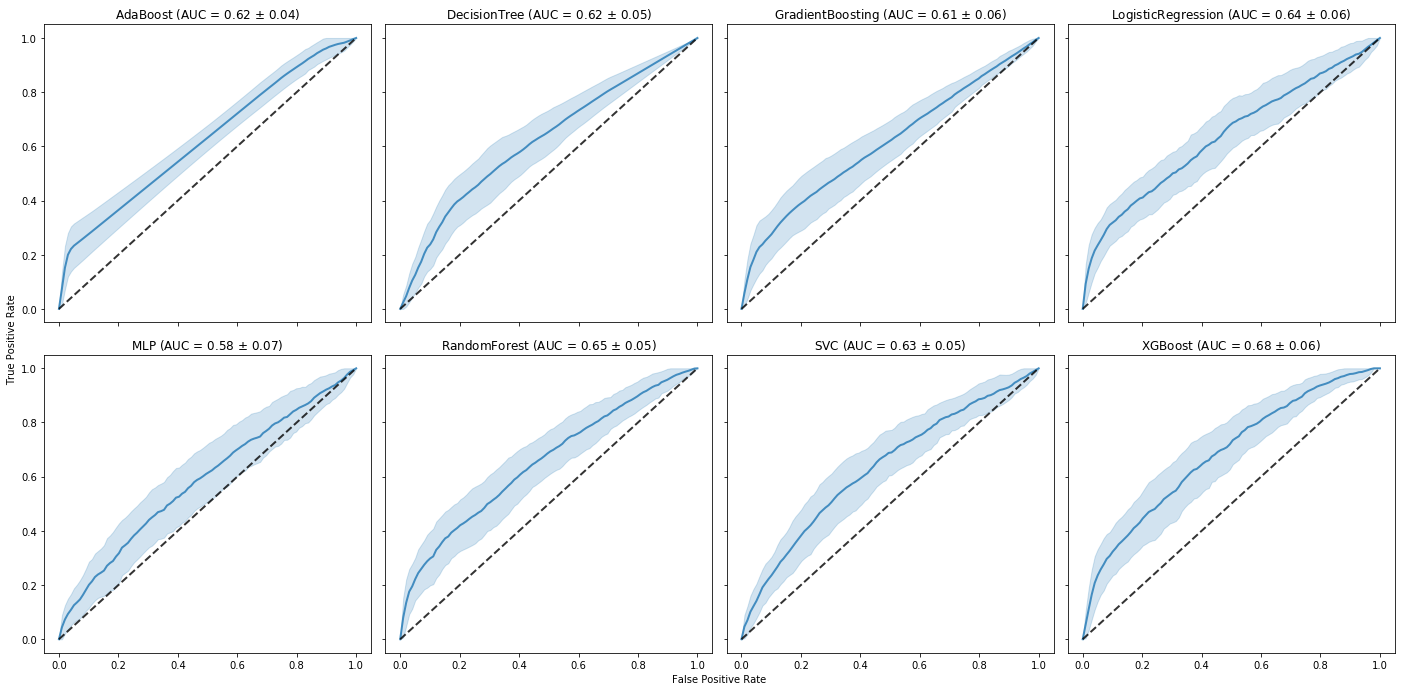

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,10))
ax = ax.flatten()

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#fig.suptitle("ROC AUC Scores by Algorithm Type")

cmap = plt.get_cmap('tab10')
scoresList = []

for k, file in enumerate(fileList):
    #load hyperparameter optimization files
    results = pd.read_csv(file)
    
    # find the model_name from the filename
    file_split = file.split('/')[3]
    model_name = file_split.split('\\')[0]
    
    print(file)

    new_results = results.copy()

    # String to dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)

    # Sort with best values on top
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)

    # Use best hyperparameters to create a model
    hyperparameters = new_results.loc[0, 'hyperparameters']
    
    # load the appropriate model and fit on training data
    model = load_model(model_name, hyperparameters)
    classifier = model
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    
    for j in range(0,10):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=j)
        for i, (train, test) in enumerate(cv.split(X_train, Y_train)):
            
            classifier.fit(np.array(X_train)[train], np.array(Y_train)[train])
            
            viz = plot_roc_curve(classifier, np.array(X_train)[test], np.array(Y_train)[test],
                         alpha=0.0, lw=1, ax=ax[k], label='hold')
            interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(viz.roc_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[k].plot(mean_fpr, mean_tpr, color=cmap(0.1*0), label=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (model_name, mean_auc, std_auc), lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[k].fill_between(mean_fpr, tprs_lower, tprs_upper, color=cmap(0.1*0), alpha=.2)

    ax[k].plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Chance', alpha=.8)
    ax[k].xaxis.label.set_visible(False)
    ax[k].yaxis.label.set_visible(False)
    ax[k].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=r'%s (AUC = %0.2f $\pm$ %0.2f)' % (model_name, mean_auc, std_auc))
    ax[k].get_legend().remove()
    #ax[k].legend(loc="lower right")

#save the figure
plt.savefig('../reports/figures/Crossval_subplots_ROC_AUC_comparison.png')

plt.tight_layout()
plt.show()

In [67]:
def crossval_scores(model, X_test, Y_test):
    
    sensitivityList = []
    specificityList = []
    PPVList = []
    NPVList = []
    PrecisionList = []
    RecallList = []
    f1List = []
    aucList = []
    
    for j in range(0,10):
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=j)
        for i, (train, test) in enumerate(cv.split(X_train, Y_train)):
    
            #fit model
            model.fit(np.array(X_train)[train], np.array(Y_train)[train])
            # predict probabilities
            lr_probs = model.predict_proba(np.array(X_train)[test])
            preds = model.predict(np.array(X_train)[test])

            labels = np.array(Y_train)[test]
            predictions = lr_probs
            preds_class = preds
            

            # calculate scores and curve
            precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(labels, preds_class, average='binary')

            PrecisionList.append(precision)
            RecallList.append(recall)
            f1List.append(f1)

            tn, fp, fn, tp = sklearn.metrics.confusion_matrix(labels, preds_class).ravel()

            sensitivity = tp / (tp + fn)
            specificity = tn / (tn + fp)
            PPV = tp / (tp + fp)
            NPV = tn / (tn + fn)

            sensitivityList.append(sensitivity)
            specificityList.append(specificity)
            PPVList.append(PPV)
            NPVList.append(NPV)

            aucList.append(sklearn.metrics.roc_auc_score(labels, predictions[:,1]))

    return sensitivityList, specificityList, PPVList, NPVList, PrecisionList, RecallList, f1List, aucList

In [89]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [94]:
table = []
modelList = []
for k, file in enumerate(fileList):
    #load hyperparameter optimization files
    results = pd.read_csv(file)
    
    # find the model_name from the filename
    file_split = file.split('/')[3]
    model_name = file_split.split('\\')[0]
    modelList.append(model_name)
    
    print(file)

    new_results = results.copy()

    # String to dictionary
    new_results['hyperparameters'] = new_results['hyperparameters'].map(ast.literal_eval)

    # Sort with best values on top
    new_results = new_results.sort_values('score', ascending = False).reset_index(drop = True)

    # Use best hyperparameters to create a model
    hyperparameters = new_results.loc[0, 'hyperparameters']
    
    # load the appropriate model and fit on training data
    model = load_model(model_name, hyperparameters)

    sens, spec, ppv, npv, prec, recall, f1, auc = crossval_scores(model, X_train, Y_train)
    
    
    sens.sort()
    spec.sort()
    ppv.sort()
    npv.sort()
    f1.sort()
    auc.sort()
    
    intervals = [sens, spec, ppv, npv, f1, auc]   
    intervals = [[x for x in y if not np.isnan(x)] for y in intervals]
    
    row = []
    for j, value in enumerate(intervals):
        mean, lower, upper = mean_confidence_interval(value)
        text = '{:0.2f} ({:0.2f} to {:0.2f})'.format(mean, lower, upper)
        row.append(text)
    
    table.append(row)

../reports/optimization/AdaBoost\2021-01-17_bayes_test.csv
../reports/optimization/DecisionTree\2021-01-17_bayes_test.csv
../reports/optimization/GradientBoosting\2021-01-17_bayes_test.csv
../reports/optimization/LogisticRegression\2021-01-17_bayes_test.csv
../reports/optimization/MLP\2021-01-17_bayes_test.csv
../reports/optimization/RandomForest\2021-01-17_bayes_test.csv
../reports/optimization/SVC\2021-01-17_bayes_test.csv
../reports/optimization/XGBoost\2021-01-17_bayes_test.csv


In [104]:
ci_df = pd.DataFrame(table, columns=['Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1-score', 'AUC'], index=modelList)


def bold_max(data, weight='bold'):
    '''
    bold the maximum in a Series or DataFrame
    '''
    attr = 'font-weight: {}'.format(weight)
    
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)
    
ci_df.style.apply(bold_max)

,Sensitivity,Specificity,PPV,NPV,F1-score,AUC
AdaBoost,0.18 (0.15 to 0.21),0.97 (0.97 to 0.98),0.33 (0.28 to 0.37),0.94 (0.94 to 0.94),0.23 (0.19 to 0.26),0.62 (0.61 to 0.63)
DecisionTree,0.45 (0.42 to 0.48),0.75 (0.74 to 0.76),0.12 (0.12 to 0.13),0.95 (0.94 to 0.95),0.19 (0.18 to 0.20),0.62 (0.61 to 0.64)
GradientBoosting,0.27 (0.20 to 0.34),0.84 (0.79 to 0.88),0.12 (0.11 to 0.13),0.94 (0.93 to 0.94),0.11 (0.08 to 0.14),0.61 (0.59 to 0.63)
LogisticRegression,0.49 (0.46 to 0.51),0.70 (0.69 to 0.72),0.12 (0.11 to 0.12),0.95 (0.94 to 0.95),0.19 (0.18 to 0.19),0.64 (0.62 to 0.65)
MLP,0.13 (0.11 to 0.15),0.94 (0.93 to 0.94),0.15 (0.13 to 0.18),0.93 (0.93 to 0.93),0.14 (0.12 to 0.16),0.57 (0.55 to 0.58)
RandomForest,0.39 (0.37 to 0.42),0.83 (0.81 to 0.84),0.16 (0.15 to 0.17),0.95 (0.94 to 0.95),0.22 (0.21 to 0.24),0.65 (0.64 to 0.67)
SVC,0.35 (0.33 to 0.38),0.81 (0.80 to 0.82),0.13 (0.12 to 0.14),0.94 (0.94 to 0.94),0.19 (0.18 to 0.20),0.63 (0.62 to 0.65)
XGBoost,0.50 (0.47 to 0.53),0.74 (0.73 to 0.75),0.13 (0.12 to 0.14),0.95 (0.95 to 0.95),0.21 (0.20 to 0.22),0.68 (0.67 to 0.70)


In [105]:
def getTableHTML(df, string=False):
    
    """
    Get a Jupyter like html of pandas dataframe
    
    """

    styles = [
        #table properties
        dict(selector=" ", 
             props=[("margin","0"),
                    ("font-family",'"Helvetica", "Arial", sans-serif'),
                    ("border-collapse", "collapse"),
                    ("border","none"),
                    #("border", "2px solid #ccf")
                    ("column-gap", "400px")
                       ]),

        #background shading
        dict(selector="tbody tr:nth-child(even)",
             props=[("background-color", "#fff")]),
        dict(selector="tbody tr:nth-child(odd)",
             props=[("background-color", "#eee")]),

        #cell spacing
        dict(selector="td", 
             props=[("padding", ".4em")]),

        #header cell properties
        dict(selector="th", 
             props=[("font-size", "100%"),
                    ("text-align", "center")]),
    ]
    
    if not string:
        out = (df.style.apply(bold_max).format("{:.3f}").set_table_styles(styles)).render()
    else:
        out = (df.style.apply(bold_max).set_table_styles(styles)).render()
        
    return out

In [106]:
ci_html = getTableHTML(ci_df, string=True)

In [107]:
html = ci_html

## OUTPUT AN HTML FILE
with open('../reports/figures/crossval_performance_characteristics.html', 'w') as f:
    f.write(html)

In [108]:
f.close()